In [1]:
import pandas as pd
import numpy as np

# Expectativas Ingênuas

In [2]:
def exp_ing(a,b, t, Xinicial, ro,erro):
    # Parâmetro
    parametro = b/(1-a)
    # Colunas
    columns = ["Xt", "Yt"]
    
    # Tabela Inicial
    tabela_inicial = np.empty((t+1, 2))
    
    # Se ro for zero
    if ro == 0:
        X = [Xinicial for _ in range(t+1)]
        Y = [parametro*Xinicial for _ in range(t+1)]
        tabela_inicial = {'Xt':X, 'Yt':Y}
        return pd.DataFrame(tabela_inicial, columns=columns).rename_axis('t')
        
    
    # Tabela
    tabela = pd.DataFrame(tabela_inicial, columns=columns)
    tabela.index.name = 't'
    

    
    # Condições iniciais
    Xpast = Xinicial
    Xpresent = ro*Xinicial
    Ypresent = parametro*Xpast
    tabela.iloc[0] = [Xinicial, parametro*Xinicial]
    
    # Calculando valores para cada período
    for period in range(1,t+1):
            Xpresent = ro*Xpast + erro
            Ypresent = parametro*Xpresent
                
            Xpast = Xpresent

                
            tabela.iloc[period] = [Xpresent, Ypresent]
            
    return tabela

In [3]:
# ro = 0.5
exp_ing(a=0.9, b=1, t=10, Xinicial=1, ro=0.5, erro=1)

,Xt,Yt
t,,
0,1.000000,10.000000
1,1.500000,15.000000
2,1.750000,17.500000
3,1.875000,18.750000
4,1.937500,19.375000
5,1.968750,19.687500
6,1.984375,19.843750
7,1.992188,19.921875
8,1.996094,19.960938


In [4]:
# ro = 0
exp_ing(a=0.9, b=1, t=10, Xinicial=1, ro=0, erro=1)

,Xt,Yt
t,,
0,1,10.0
1,1,10.0
2,1,10.0
3,1,10.0
4,1,10.0
5,1,10.0
6,1,10.0
7,1,10.0
8,1,10.0


# Expectativas Adaptativas

In [5]:
def exp_adapt(a,b, t, Xinicial, ro, erro):
    # Tabela
    tabela = pd.DataFrame(np.empty((11, 2)), columns=["Xt", "Yt"])
    tabela.index.name = 't'
    
    # Parâmetro
    parametro = b/(1-a*ro)
    
    # Condições iniciais
    Xpast = Xinicial
    Xpresent = ro*Xinicial + erro
    Ypast = parametro* Xinicial
    Ypresent = ro*Ypast + parametro*erro
    
    # Calculando valores para cada período
    for period in range(t+1):
            if period > 0:
                Xpresent = ro*Xpast + erro
                Ypresent = ro*Ypast + parametro*erro
                
                Xpast = Xpresent
                Ypast = Ypresent

                
            tabela.iloc[period] = [Xpresent, Ypresent]
            
    return tabela



In [6]:
# ro = 0.5
exp_adapt(a=0.9,b=1, t=10,ro=0.5,erro=1, Xinicial=1)

,Xt,Yt
t,,
0,1.500000,2.727273
1,1.500000,2.727273
2,1.750000,3.181818
3,1.875000,3.409091
4,1.937500,3.522727
5,1.968750,3.579545
6,1.984375,3.607955
7,1.992188,3.622159
8,1.996094,3.629261


In [7]:
# ro = 0
exp_adapt(a=0.9,b=1, t=10,ro=0,erro=1, Xinicial=1)

,Xt,Yt
t,,
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0
5,1.0,1.0
6,1.0,1.0
7,1.0,1.0
8,1.0,1.0


# Visualizando Dados

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
# Expectativas Adaptativas e Ingênuas quando ro = 0.5
ing = exp_ing(a=0.9, b=1, t=10, Xinicial=1, ro=0.5, erro=1)
adapt = exp_adapt(a=0.9,b=1, t=10,ro=0.5,erro=1, Xinicial=1)

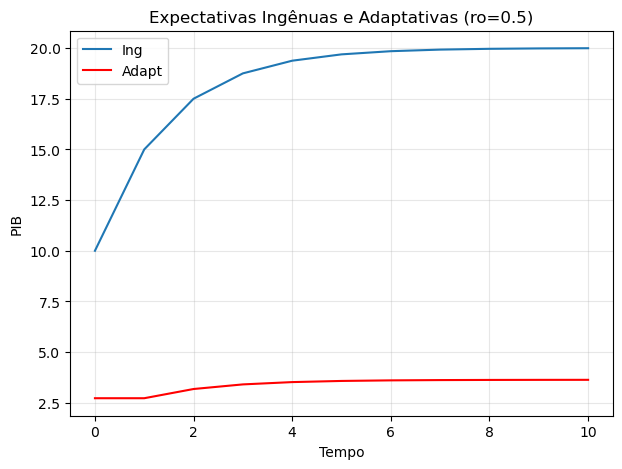

In [10]:
fig, ax = plt.subplots(1,1, figsize=(7,5), sharey=True)

ax.grid(visible=True, alpha=.3)

ax.plot(ing.drop('Xt', axis=1))
ax.plot(adapt.drop('Xt', axis=1), color='red')

ax.set_title('Expectativas Ingênuas e Adaptativas (ro=0.5)')
ax.legend(['Ing', 'Adapt'])
ax.set_xlabel('Tempo')
ax.set_ylabel('PIB')

plt.show()

In [11]:
# Expectativas Adaptativas e Ingênuas quando ro = 0
ing = exp_ing(a=0.9, b=1, t=10, Xinicial=1, ro=0, erro=1)
adapt = exp_adapt(a=0.9,b=1, t=10,ro=0,erro=1, Xinicial=1)

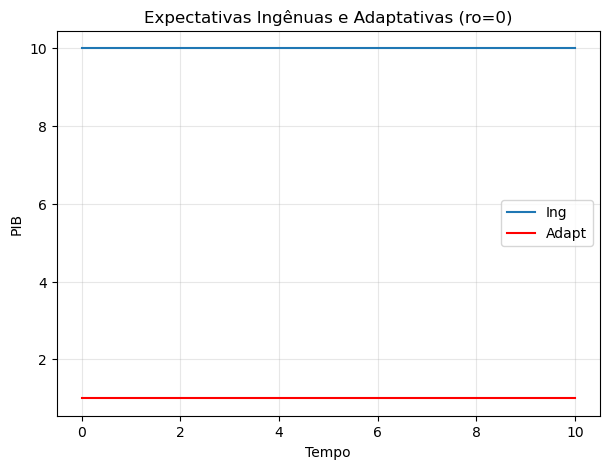

In [12]:
fig, ax = plt.subplots(1,1, figsize=(7,5), sharey=True)

ax.grid(visible=True, alpha=.3)

ax.plot(ing.drop('Xt', axis=1))
ax.plot(adapt.drop('Xt', axis=1), color='red')
ax.set_xlabel('Tempo')
ax.set_ylabel('PIB')

ax.set_title('Expectativas Ingênuas e Adaptativas (ro=0)')
ax.legend(['Ing', 'Adapt'])

plt.show()

In [14]:
# Juntando Tudo
ing_ro0 = exp_ing(a=0.9, b=1, t=10, Xinicial=1, ro=0, erro=1).drop("Xt", axis=1)
adapt_ro0 = exp_adapt(a=0.9,b=1, t=10,ro=0,erro=1, Xinicial=1).drop("Xt", axis=1)
ing = exp_ing(a=0.9, b=1, t=10, Xinicial=1, ro=0.5, erro=1).drop("Xt", axis=1)
adapt = exp_adapt(a=0.9,b=1, t=10,ro=0.5,erro=1, Xinicial=1).drop("Xt", axis=1)

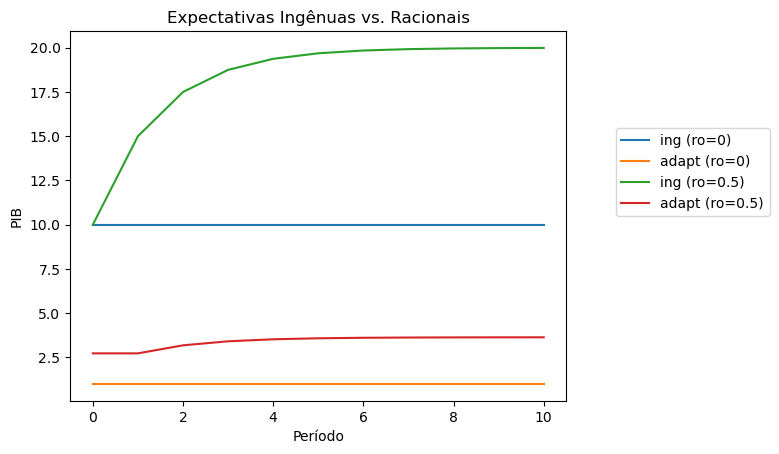

In [23]:
plt.plot(ing_ro0)
plt.plot(adapt_ro0)
plt.plot(ing)
plt.plot(adapt)

plt.title("Expectativas Ingênuas vs. Racionais")
plt.xlabel('Período')
plt.ylabel("PIB")
plt.legend(['ing (ro=0)', 'adapt (ro=0)', 'ing (ro=0.5)', 'adapt (ro=0.5)'], loc=(1.1, .5))